# Recent rainfall data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json

We get the recent rainfall data from the UK defra website, see https://environment.data.gov.uk/flood-monitoring/doc/rainfall. We first load and parse the JSON data into a pandas DataFrame.

In [2]:
def load_data(url):
    response = json.loads(requests.get(url).text)
    data = pd.DataFrame(response['items'])
    datetimes = data['dateTime']
    data.drop(columns = ['@id','measure','dateTime'], inplace=True)
    data.set_index(pd.to_datetime(datetimes), inplace=True)
    return data

def build_url(station_ID, N_days=28):
    data_url = "https://environment.data.gov.uk/flood-monitoring/id/stations/"
    url_param = "/readings.json?startdate=2022-06-01&enddate=2022-07-14&_sorted&parameter=rainfall&_limit=10000"
    url = data_url + station_ID + url_param
    return url

In [3]:
N_days = 28
station_ID = "245176TP"

data = load_data(build_url(station_ID,N_days))
data.head()

,value
dateTime,
2022-07-14 23:45:00+00:00,0.0
2022-07-14 23:30:00+00:00,0.0
2022-07-14 23:15:00+00:00,0.0
2022-07-14 23:00:00+00:00,0.0
2022-07-14 22:45:00+00:00,0.0


<AxesSubplot:xlabel='dateTime'>

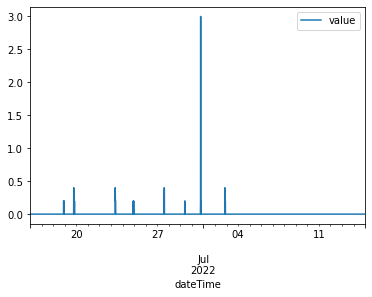

In [7]:
data.plot()

That plot is not very helpful. Let's resample to daily rainfall and make a prettier plot.

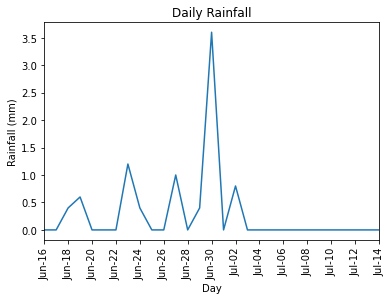

In [8]:
from matplotlib.dates import DayLocator, DateFormatter

data_daily = data.resample('1D').sum()

fig, ax = plt.subplots()
data_daily.plot(ax=ax, legend=None)
ax.tick_params(axis='x', which='both', bottom=False, labelbottom=False)
ax.xaxis.set_major_locator(DayLocator(interval=2))
ax.xaxis.set_major_formatter(DateFormatter("%b-%d"))
ax.tick_params(axis="x", labelrotation= 90, bottom=True,labelbottom=True)

ax.set_title('Daily Rainfall')
ax.set_ylabel('Rainfall (mm)')
_ = ax.set_xlabel('Day')